# Exploring reddit data using Spark

This notebook provides startup code for downloading Reddit data from the Azure Blob Storage bucket specifically setup for this project.   
_<b>Make sure you are running this notebook on a cluster which has the credentials setup to access Azure Blob Storage, otherwise this notebook will not be able to read the data!</b>_

_<b>Make sure you are using DataBricks Runtime 11.3 or newer otherwise you will not be able to save any new files in this repository!</b>_

The dataset for this notebook is described in [The Pushshift Reddit Dataset](https://arxiv.org/pdf/2001.08435.pdf) paper.

# Instruction
YouTube and Twitch: The online video heavyweight battle of the century.

While there are many similarities between Twitch and YouTube - for example, they are both audio/video sharing platforms - there are also many differences between the two platforms.

The most significant difference between Twitch and YouTube is the viewer's interest. Twitch caters to live-stream hosts and is the largest live-streaming platform in the world. On the other hand, YouTube uses an excellent search engine to help those interested in a specific topic find videos that match their heart's expectations.

While the two video sites have different focuses, they also have similar modules. YouTube, for example, has a live streaming system, while Twitch is also drawing on more different categories of video submissions.

This study examines the difference in users' focus using these two video platforms by comparing two different subreddit statements on Reddit, 'youtube' and 'Twitch'.

## Propose 10 different avenues of analysis for your data.

### 1. What is the total performance of users’ comments on Twitch and Youtube in recent 2 years?
##### Business Goal: 
Python and Spark would be the primary programming languages used to compare the total comments analysis between Twitch and Youtube users. By doing this, readers can therefore get an overview of the total users activities between these two social media platforms from 2021/01/01 to 2022/08/31. 
##### Technical Proposal：
Technically, packages of seaborn and matplotlib would be adapted to vividly show visualizations. The new datasets of ‘submissions_twitch’, ‘submissions_youtube’ are generated based on 15 variables such as ‘author_id’, ‘title’, and so on. Two bar plots would therefore be generated with the columns of ‘num_comments’ in these two new datasets. 

### 2. What’s the Time series patterns of comments number. Based on Q1 
##### Business Goal: 
To define time series patterns for Twitch comments and Youtube comments. 
##### Technical Proposal: 
Use “plotly” to do line plots based on date and ‘num_comments’, and combine the Twitch plots with Youtube plots. Find whether there are the same patterns between Twitch comments and Youtube comments. Then analyze the user activity behavior. And try to track the influence of those big news (some may match with the summits in plots) 


### 3. What’s the relationship between length of comments and “score”(upvote-downvote)?
##### Business Goal: 
Determine if long comments could represent high quality comments somehow. 
##### Technical Proposal: 
Create a new column called “body_length”, which saves numeric data representing the length of comments. Create a scatter plot that compares the body_length and score. (Here we define that a high quality comment doesn't  have to be right or receive a positive score, instead as long as it could activate people to give responses and even write down sub-comments. Thus a very low negative score also can be considered a high quality comments. )

### 4. What’s the ratio of having outer links in Youtube and Twitch? Are comments with an outer link are more likely to have a higher score?
##### Business Goal: 
Determine whether having outer links means giving higher quality comments. And analyze the outer links ratio in these two platforms.
##### Technical Proposal: 
Choose “is_self” as a new feature. Generate two pie charts for the ratio of having outer links in Youtube and Twitch, and then compare and analyze the result. Build another viz that contains the information of “is_self” and “score”, find whether these two features have any correlation to each other.

### 5. What’s the hottest topics in Youtube and Twitch Reddits?
##### Business goal: 
To define the most popular topics for Youtube and Twitch lovers. Dive deeper into user hobbies in social media.
##### Technical Proposal: 
Select the “body” column in “comments_youtube” and “comments_twitch” table, use “Wordcloud”, “matplotlib”, “pandas'' to generate word clouds and word frequency lists for Youtube and Twitch comments. Implement key words analysis. Compare their word clouds viz and frequency lists, and find their differences and similarities.

### 6. What are the top 10 qualified topics that users agree most for both Youtube and Twitch? Based on Q5. 
##### Business Goal: 
The goal is to discover the topic for youtube and twitch which receive the top 10 of reviewing scores correspondingly. This would reflect the users’ acceptance level for each topic. Python and Spark would be the primary programming languages used for this business goal. 
##### Technical Proposal: 
The column of ‘score’ from the submissions_youtube and submissions_twitch would be used. Since the score column is created by subtracting the downvotes from upvotes, the scores would be balanced to 0 if the topic is too controversial or not influential at all. The quantitative analysis would be conducted to filter topics with the top 10 highest reviewing scores. 

### 7. What are the similarities and differences of the topic that is detected over 18 or below 18 on twitch and youtube? Based on Q5.
##### Business Goal: 
The goal is to discover the insights of the functions of platforms that users care about based on whether the comment is over 18 or not. The programming languages would be Spark and Python. 
##### Technical Proposal: 
Based on the business goal of getting the most popular topic based on users’ ages. The NLP tool of Text Classification analysis can be conducted. For plotting, the table of ‘submissions_twitch’ and ‘‘submissions_youtube’ and column of ‘over_18’ would be used; the machine learning methods of decision trees might also 
used to classify the content that a specific topic has the most. 

### 8. How to help the company predict the future over-18 comments and posts? Based on Q7.
##### Business Goal: 
The goal is to improve the overall quality of the subreddit platform, and therefore, improve the efficiency for administrators when dealing with posts. The programming languages used would be Python and Spark. 
##### Technical Proposal: 
The table of ‘submissions_twitch’ and ‘submissions_youtube’ would be used. And the columns of ‘title’, ‘selftext’, and ‘over_18’ can be used. Since titles are all text data, the method of vectorization should be applied first. Then, the training and testing dataset would be splitted for doing the predictive models. For prediction, the NLP model of text prediction can be used to help the administrator automatically determine if the text is over-18 and needs to be deleted. 

### 9. Sentiments analysis for Youtube and Twitch Reddits? Based on Q5.
##### Business Goal: 
Analyze redditers’ sentiments score and make comparison between these two video based platforms.
##### Technical Proposal: 
Apply “nltk” package in the “body” column to perform data tokenization, lementization, stopword removal. Pretrained models will be used to inference text sentiment. Comparisons based on sentiment and interactive features including scores and number of comments will be drawn.

### 10. Provide a list of technical problems, what is the frequency that users have on these technical problems of each platform? / Any suggestions for twitch and youtube to improve based on users’ post? 
##### Business Goal: 
The goal of this business question is to help twitch and youtube discover the most frequent problems that users meet, and help them to improve the user experience. The programming language used for this question would be Python and Spark. 
##### Technical Proposal: 
In order to filter the topics, a list of technical problems such as ‘appcrash’ and ‘server collapse’ needs to be collected first. TFIDF would be used to deal with the text data.  After cleaning the dataset, the NLP method of Keyword Extraction can be conducted to extract the topic word and fit the problems to posts.

## Read Data From DBFS

### Submission Data

In [0]:
submissions_nona=spark.read.parquet("/FileStore/data/submissions_nona.parquet")
submissions_nona.show()

+------+---------+---------+--------------------+--------------------+--------------+------------+-------+--------+----------------+-------+--------+--------+-----+-----------+-----------+-----------+---------+
|    id|author_id|subreddit|               title|            selftext|num_crossposts|num_comments|is_self|is_video|is_crosspostable|over_18|promoted|stickied|score|created_utc|score_dummy|title_dummy|len_title|
+------+---------+---------+--------------------+--------------------+--------------+------------+-------+--------+----------------+-------+--------+--------+-----+-----------+-----------+-----------+---------+
|qw75mm|     null|   Twitch|Streams I watch h...|For a time I thou...|             0|           0|   true|   false|            true|  false|    null|   false|    1| 11/17/2021|          1|          0|       83|
|qw7j0b|     null|   Twitch|My boyfriend just...|                    |             0|           1|  false|   false|           false|  false|    null|   fals

In [0]:
submissions_nona.count()

Out[2]: 174929

In [0]:
submissions_nona.filter(submissions_nona.score!=0).count()

Out[3]: 136377

In [0]:
# dbutils.fs.rm("/FileStore/data/submissions_nona.parquet", True)

Out[170]: True

### Comments Data

In [0]:
comments_nona =spark.read.parquet("/FileStore/data/comments_nona.parquet")

In [0]:
comments_nona.show()

+-------+---------+-----------------+--------------------+-----+-----------+---------+
|     id|  link_id|           author|                body|score|created_utc|subreddit|
+-------+---------+-----------------+--------------------+-----+-----------+---------+
|he1xe2z|t3_ptu46x|      SenpaiKira2|here's soap, wash...|  -10| 09/24/2021|  youtube|
|he1xx74|t3_ptu46x|        Techestro|Just uninstall yo...|   11| 09/24/2021|  youtube|
|he1ydyf|t3_puce9m|    AutoModerator|Sorry Limp-Sun140...|    1| 09/24/2021|  youtube|
|he1yxa9|t3_pu40rj|     AUSTINguy0oo|Isn’t YouTube 13 ...|    3| 09/24/2021|  youtube|
|he1z5e6|t3_puav5y|     AUSTINguy0oo|They’ve done it t...|    1| 09/24/2021|  youtube|
|he1z83e|t3_pub8ed|Far_Butterfly5501|Personalized or N...|    3| 09/24/2021|  youtube|
|he1zcg6|t3_pu8j62|         LOL_WhyT|Opera GX lets you...|    3| 09/24/2021|  youtube|
|h88gbak|t3_p0i1nf|       w3y3vrn_BB|They were talking...|   21| 08/09/2021|  youtube|
|h88gjtj|t3_p0r6ov|    AutoModerator|Hi Old

In [0]:
comments_nona.count()

Out[6]: 948783

### Time Series

In [0]:
number_sub_byhour = pd.read_csv("/dbfs/FileStore/data/number_sub_byhour.csv")

In [0]:
number_sub_byhour.head()

,created_utc,subreddit,count
0,2021-04-24 07:00:00,youtube,8
1,2021-10-11 06:00:00,youtube,8
2,2021-08-26 10:00:00,youtube,10
3,2021-05-28 18:00:00,youtube,15
4,2021-04-06 06:00:00,youtube,10


# Machine Learning

In [0]:
from pyspark.sql import SparkSession
from sparknlp.pretrained import PretrainedPipeline
import sparknlp
from sparknlp.base import *
from sparknlp.annotator import *
import pyspark.sql.functions as f
from pyspark.sql.functions import when, col
from pyspark.ml.feature import CountVectorizer, IDF, HashingTF, SQLTransformer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sparknlp.pretrained import PretrainedPipeline
from pyspark.ml.linalg import Vectors
# Start Spark Session with Spark NLP
# spark = sparknlp.start()

In [0]:
# Start Spark Session with Spark NLP
spark = SparkSession.builder \
        .appName("SparkNLP") \
        .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
        .config("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.12:4.2.1") \
    .master('yarn') \
    .getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.0 
 Master 
 spark://10.139.64.5:7077 
 AppName 
 Databricks Shell

##  Note
* 2 transformations
* Split data into testing and training data if you are running supervised models.
* answer at least two different business questions (more is always fine!)
* Within each analysis, you will compare the performance of two or more models types by selecting at least two different hyperparameter sets OR at least two different pretrained models. 
* At least one of these model analyses must leverage Spark MLlib models
* Run model evaluation metrics (ROC AUC, Confusion Matrix, Accuracy, R2, etc.) on your models and/or hyperparameter options.
* Evaluate your models using at least two different metrics and compare and interpret your results, for each ML analysis.
* Prepare at least 1 appropriate table and at least 1 chart for each ML analysis. You do not need one for every model / hyperparameter set
* You must save at least one ML model into DBFS. Demonstrate that you can save your best ML model and load the prepared model into your notebook and start making predictions without any additional training. This can be done in a separate notebook.
* Pipeline bonus: (+4 points): Apply pipelines to your ML analysis so that you can compare hyperparameters and model options without having to re-run large parts of code. Be sure to clearly indicate in your notebook and on your website the code you are implementing for the bonus.

# Executive Summary

## Classification Model

In [0]:
comments_nona.filter(comments_nona["score"] == 1).count()

Out[8]: 529646

In [0]:
comments_Score = comments_nona.withColumn('score_level', when((col("score")>1) & (col("score")<8), "Somewhat agree")
                                                        .when((col("score")<-1) & (col("score")>-8), "Somewhat disagree")
                                                        .when(col("score")>=8, "Strongly agree")
                                                        .when(col("score")<=-8, "Strongly disagree")
                                                        .otherwise("Neither agree nor disagree"))

In [0]:
score_leveldf = comments_Score.groupby("score_level","subreddit").count().orderBy(col("subreddit").asc(),col("count").desc()).cache().toPandas()

In [0]:
score_leveldf["proportion"] = score_leveldf["count"] / score_leveldf.groupby('subreddit')['count'].transform('sum')

In [0]:
score_leveldf

,score_level,subreddit,count,proportion
0,Neither agree nor disagree,Twitch,315904,0.580643
1,Somewhat agree,Twitch,181041,0.332760
2,Strongly agree,Twitch,33957,0.062414
3,Somewhat disagree,Twitch,9730,0.017884
4,Strongly disagree,Twitch,3427,0.006299
5,Neither agree nor disagree,youtube,265927,0.657058
6,Somewhat agree,youtube,102451,0.253138
7,Strongly agree,youtube,30471,0.075288
8,Somewhat disagree,youtube,3861,0.009540
9,Strongly disagree,youtube,2014,0.004976


In [0]:
display(score_leveldf)

score_level,subreddit,count,proportion
Neither agree nor disagree,Twitch,315904,0.5806429082139989
Somewhat agree,Twitch,181041,0.3327598661174615
Strongly agree,Twitch,33957,0.06241418669666341
Somewhat disagree,Twitch,9730,0.017884089777027858
Strongly disagree,Twitch,3427,0.006298949194848353
Neither agree nor disagree,youtube,265927,0.6570576491633805
Somewhat agree,youtube,102451,0.25313794091776126
Strongly agree,youtube,30471,0.0752883446496872
Somewhat disagree,youtube,3861,0.009539834553918226
Strongly disagree,youtube,2014,0.004976230715252864


Output can only be rendered in Databricks

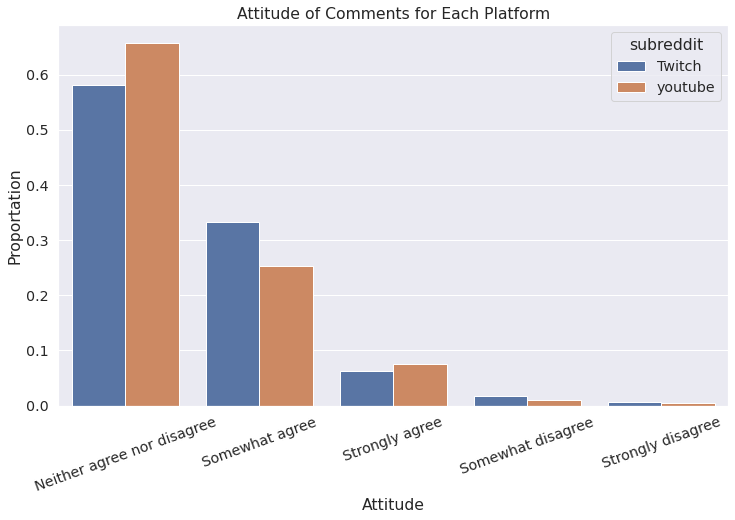

In [0]:
plt.figure(figsize=(12, 7))
sns.set(font_scale=1.3)
sns.barplot(data=score_leveldf, x="score_level", y="proportion", hue="subreddit").set(title='Attitude of Comments for Each Platform', xlabel='Attitude', ylabel='Proportation')
plt.xticks(rotation=20)
plt.show() 

The score in the comment has been divided into five different levels: Strongly agree (score is greater than 7), Somewhat agree (score is between 2 to 7), neither agree nor disagree (score is between -1 to 1), somewhat disagree (score is between -7 to -2) and strongly disagree (score is smaller than -7). Since the comments population differs from youtube and Twitch, the graph above shows the proportion for each group in different subreddit. The majority remains indifferent (neither agree nor disagree). Those who really care are more inclined to give upvotes. Youtube users tend to have a consensus for solid agreements.

### Train test split

The data is imbalance, we will apply the weight into RandomForestClassifier. PySpark needs to have a weight assigned to each instance (i.e., row) in the training set. The team create a mapping to apply a weight to each training instance.

In [0]:
import numpy as np
stringIndexer_attitude = StringIndexer(inputCol="score_level", outputCol="agree_level")
Score_df = stringIndexer_attitude.fit(comments_Score).transform(comments_Score)
y_collect = Score_df.select("score_level").groupBy("score_level").count().collect()
unique_y = [x["score_level"] for x in y_collect]
total_y = sum([x["count"] for x in y_collect])
unique_y_count = len(y_collect)
bin_count = [x["count"] for x in y_collect]
class_weights_spark = {i: ii for i, ii in zip(unique_y, total_y / (unique_y_count * np.array(bin_count)))}

In [0]:
Score_df.show(5)

+-------+---------+-------------+--------------------+-----+-----------+---------+--------------------+-----------+
|     id|  link_id|       author|                body|score|created_utc|subreddit|         score_level|agree_level|
+-------+---------+-------------+--------------------+-----+-----------+---------+--------------------+-----------+
|he1xe2z|t3_ptu46x|  SenpaiKira2|here's soap, wash...|  -10| 09/24/2021|  youtube|   Strongly disagree|        4.0|
|he1xx74|t3_ptu46x|    Techestro|Just uninstall yo...|   11| 09/24/2021|  youtube|      Strongly agree|        2.0|
|he1ydyf|t3_puce9m|AutoModerator|Sorry Limp-Sun140...|    1| 09/24/2021|  youtube|Neither agree nor...|        0.0|
|he1yxa9|t3_pu40rj| AUSTINguy0oo|Isn’t YouTube 13 ...|    3| 09/24/2021|  youtube|      Somewhat agree|        1.0|
|he1z5e6|t3_puav5y| AUSTINguy0oo|They’ve done it t...|    1| 09/24/2021|  youtube|Neither agree nor...|        0.0|
+-------+---------+-------------+--------------------+-----+-----------+

In [0]:
class_weights_spark

Out[85]: {'Somewhat disagree': 13.961930689426827,
 'Strongly agree': 2.9452505121996646,
 'Strongly disagree': 34.875317037309316,
 'Neither agree nor disagree': 0.32613697104485667,
 'Somewhat agree': 0.6693543380412851}

In [0]:
from itertools import chain
mapping_expr = f.create_map([f.lit(x) for x in chain(*class_weights_spark.items())])
comments_Score = comments_Score.withColumn("weight", mapping_expr.getItem(col("score_levbel")))

/databricks/spark/python/pyspark/sql/column.py:423: FutureWarning: A column as 'key' in getItem is deprecated as of Spark 3.0, and will not be supported in the future release. Use `column[key]` or `column.key` syntax instead.
  warnings.warn(


In [0]:
comments_Score.show(5)

+-------+---------+-------------+--------------------+-----+-----------+---------+--------------------+-------------------+
|     id|  link_id|       author|                body|score|created_utc|subreddit|         score_level|             weight|
+-------+---------+-------------+--------------------+-----+-----------+---------+--------------------+-------------------+
|he1xe2z|t3_ptu46x|  SenpaiKira2|here's soap, wash...|  -10| 09/24/2021|  youtube|   Strongly disagree| 34.875317037309316|
|he1xx74|t3_ptu46x|    Techestro|Just uninstall yo...|   11| 09/24/2021|  youtube|      Strongly agree| 2.9452505121996646|
|he1ydyf|t3_puce9m|AutoModerator|Sorry Limp-Sun140...|    1| 09/24/2021|  youtube|Neither agree nor...|0.32613697104485667|
|he1yxa9|t3_pu40rj| AUSTINguy0oo|Isn’t YouTube 13 ...|    3| 09/24/2021|  youtube|      Somewhat agree| 0.6693543380412851|
|he1z5e6|t3_puav5y| AUSTINguy0oo|They’ve done it t...|    1| 09/24/2021|  youtube|Neither agree nor...|0.32613697104485667|
+-------

In [0]:
train_data, test_data, predict_data = comments_Score.randomSplit([0.8, 0.18, 0.02], 24)

In [0]:
print("Number of training records: " + str(train_data.count()))
print("Number of testing records : " + str(test_data.count()))
print("Number of prediction records : " + str(predict_data.count()))

Number of training records: 758980
Number of testing records : 171007
Number of prediction records : 18796


### Create pipeline and train a model

In [0]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, IndexToString, VectorAssembler, RegexTokenizer, StopWordsRemover, CountVectorizer, Normalizer, IndexToString
from pyspark.ml.classification import RandomForestClassifier, LogisticRegression, DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml import Pipeline, Model

Since the training data is the body of comments, text data need to be vectorized before modeling. The team applied StringIndexer for the target variable which change different level into numerical value. After tokenization and removing stopwords, CountVectorizer were applied for the tokenized results.

In [0]:
stringIndexer_attitude = StringIndexer(inputCol="score_level", outputCol="agree_level")
regex_tokenizer = RegexTokenizer(inputCol="body", outputCol="words", pattern="\\W")
remover = StopWordsRemover(inputCol="words", outputCol="filtered")
cv = CountVectorizer(inputCol="filtered", outputCol="features")
normalizer = Normalizer(inputCol='features', outputCol= "features_norm", p=1.0)
labelConverter = IndexToString(inputCol="prediction", 
                               outputCol="predictedattitude", 
                               labels = ['Neither agree nor disagree', 'Somewhat agree', 'Strongly agree', 'Somewhat disagree', 'Strongly disagree'])

#### Random Forest Model Training

In [0]:
rf = RandomForestClassifier(labelCol="agree_level", featuresCol="features_norm", numTrees=60, maxDepth=7,  weightCol="weight")
pipeline = Pipeline(stages=[stringIndexer_attitude, regex_tokenizer, remover, cv, normalizer, rf, labelConverter])

# Fit the pipeline to training documents.
model_rf1 = pipeline.fit(train_data)

In [0]:
model_rf1.save("/FileStore/data/rf1")

#### Random Forest Model Testing

In [0]:
predictions_train = model_rf1.transform(train_data)
evaluatorRF = MulticlassClassificationEvaluator(labelCol="agree_level", predictionCol="prediction", metricName="accuracy")
accuracy = evaluatorRF.evaluate(predictions_train)

print("Accuracy = %g" % accuracy)
print("Train Error = %g" % (1.0 - accuracy))

Accuracy = 0.293377
Train Error = 0.706623


In [0]:
predictions_rf1 = model_rf1.transform(test_data)
evaluatorRF = MulticlassClassificationEvaluator(labelCol="agree_level", predictionCol="prediction", metricName="accuracy")
accuracy_rf = evaluatorRF.evaluate(predictions_rf1)

print("Accuracy = %g" % accuracy_rf)
print("Test Error = %g" % (1.0 - accuracy_rf))

Accuracy = 0.291503
Test Error = 0.708497


In [0]:
evaluatorRF = BinaryClassificationEvaluator(labelCol="agree_level", rawPredictionCol="prediction", metricName="areaUnderROC")
roc_result_rf = evaluatorRF.evaluate(predictions)
print("Test ROC = %g" % roc_result_rf)

Test ROC = 0.633014


In [0]:
rf2 = RandomForestClassifier(labelCol="agree_level", featuresCol="features_norm", numTrees=30, maxDepth=7,  weightCol="weight")
pipeline_rf = Pipeline(stages=[stringIndexer_attitude, regex_tokenizer, remover, cv, normalizer, rf2, labelConverter])

# Fit the pipeline to training documents.
model_rf = pipeline_rf.fit(train_data)

In [0]:
model_rf.save("/FileStore/data/rf2")

In [0]:
prediction_rf = model_rf.transform(test_data)
evaluatorRF = MulticlassClassificationEvaluator(labelCol="agree_level", predictionCol="prediction", metricName="accuracy")
accuracy_rf2 = evaluatorRF.evaluate(prediction_rf)

print("Accuracy = %g" % accuracy_rf2)
print("Test Error = %g" % (1.0 - accuracy_rf2))

Accuracy = 0.274761
Test Error = 0.725239


In [0]:
evaluatorRF = BinaryClassificationEvaluator(labelCol="agree_level", rawPredictionCol="prediction", metricName="areaUnderROC")
roc_result_rf2 = evaluatorRF.evaluate(prediction_rf)
print("Test ROC = %g" % roc_result_rf2)

Test ROC = 0.62977


In [0]:
lr = LogisticRegression(labelCol="agree_level", featuresCol="features_norm", maxIter=100) 
pipeline_lr = Pipeline(stages=[stringIndexer_attitude, regex_tokenizer, remover, cv, normalizer, lr, labelConverter])

# Fit the pipeline to training documents.
model_lr = pipeline_lr.fit(train_data)

In [0]:
model_lr.save("/FileStore/data/lr")

In [0]:
prediction_lr = model_lr.transform(test_data)
evaluatorLR = MulticlassClassificationEvaluator(labelCol="agree_level", predictionCol="prediction", metricName="accuracy")
accuracy_lr = evaluatorMLP.evaluate(prediction_lr)

print("Accuracy = %g" % accuracy_lr)
print("Test Error = %g" % (1.0 - accuracy_lr))

Accuracy = 0.673826
Test Error = 0.326174


In [0]:
evaluatorLR = BinaryClassificationEvaluator(labelCol="agree_level", rawPredictionCol="prediction", metricName="areaUnderROC")
roc_result_lr = evaluatorLR.evaluate(prediction_lr)
print("Test ROC = %g" % roc_result_lr)

Test ROC = 0.645923


In [0]:
dt = DecisionTreeClassifier(labelCol="agree_level", featuresCol="features_norm", maxDepth=7,  weightCol="weight")
pipeline_dt = Pipeline(stages=[stringIndexer_attitude, regex_tokenizer, remover, cv, normalizer, dt, labelConverter])

# Fit the pipeline to training documents. 
model_dt = pipeline_dt.fit(train_data)

In [0]:
model_dt.save("/FileStore/data/dt")

In [0]:
prediction_dt = model_dt.transform(test_data)
evaluatorDT = MulticlassClassificationEvaluator(labelCol="agree_level", predictionCol="prediction", metricName="accuracy")
accuracy_dt = evaluatorDT.evaluate(prediction_dt)

print("Accuracy = %g" % accuracy_dt)
print("Test Error = %g" % (1.0 - accuracy_dt))

Accuracy = 0.244405
Test Error = 0.755595


In [0]:
evaluatorDT = BinaryClassificationEvaluator(labelCol="agree_level", rawPredictionCol="prediction", metricName="areaUnderROC")
roc_result_dt = evaluatorDT.evaluate(prediction_dt)
print("Test ROC = %g" % roc_result_dt)

Test ROC = 0.637091


In [0]:
data = {'Model':  ['Logistic Regression', 'Random Forest', 'Random Forest2', 'Decision Tree'],
        'Hyperparameter': ['maxIter=100', 'numTrees=60, maxDepth=7, weight adjusted', 'numTrees=30, maxDepth=7, weight adjusted', 'maxDepth=7, weight adjusted'],
        'Accuracy': [accuracy_lr, accuracy_rf, accuracy_rf2, accuracy_dt],
        'ROC': [roc_result_lr, roc_result_rf, roc_result_rf2, roc_result_dt]
        }

df = pd.DataFrame(data)
df

,Model,Hyperparameter,Accuracy,ROC
0,Logistic Regression,maxIter=100,0.673826,0.645923
1,Random Forest,"numTrees=60, maxDepth=7, weight adjusted",0.291503,0.633014
2,Random Forest2,"numTrees=30, maxDepth=7, weight adjusted",0.274761,0.629770
3,Decision Tree,"maxDepth=7, weight adjusted",0.244405,0.637091


In [0]:
display(df)

Model,Hyperparameter,Accuracy,ROC
Logistic Regression,maxIter=100,0.6738262176402136,0.645922841385298
Random Forest,"numTrees=60, maxDepth=7, weight adjusted",0.29150268702450777,0.6330143078480077
Random Forest2,"numTrees=30, maxDepth=7, weight adjusted",0.2747606823112504,0.6297701345304935
Decision Tree,"maxDepth=7, weight adjusted",0.24440519978714323,0.6370907156122624


## Time Series Model

In this part, the team shall approach the time series structure of youtube and Twitch subreddit's hourly submission activity with SARIMA modeling techniques.

In [0]:
plt.figure(figsize=(16, 8))
sns.set_theme(style='darkgrid')  # 'whitegrid', 'dark', 'white', 'ticks'
ax = sns.lineplot(x='created_utc',
                  y='count',
                  hue='subreddit',
                  data=number_sub_byhour).set(title='Number of Submissions Per Hour')
plt.tight_layout()
plt.show()

In [0]:
ts_ytb = number_sub_byhour[number_sub_byhour['subreddit'] == 'youtube']
ts_twc = number_sub_byhour[number_sub_byhour['subreddit'] == 'Twitch']

In [0]:
ts_twc.head()

,created_utc,subreddit,count
8130,2021-06-27 11:00:00,Twitch,8
8131,2022-05-10 12:00:00,Twitch,2
8132,2022-04-22 18:00:00,Twitch,2
8133,2021-04-07 12:00:00,Twitch,6
8134,2021-08-20 09:00:00,Twitch,8


In [0]:
ts_ytb = ts_ytb.drop(columns = 'subreddit').set_index('created_utc').sort_index()
ts_twc = ts_twc.drop(columns = 'subreddit').set_index('created_utc').sort_index()

In [0]:
ts_ytb.head()

,count
created_utc,
2021-01-01 00:00:00,11
2021-01-01 01:00:00,13
2021-01-01 02:00:00,7
2021-01-01 03:00:00,14
2021-01-01 04:00:00,11


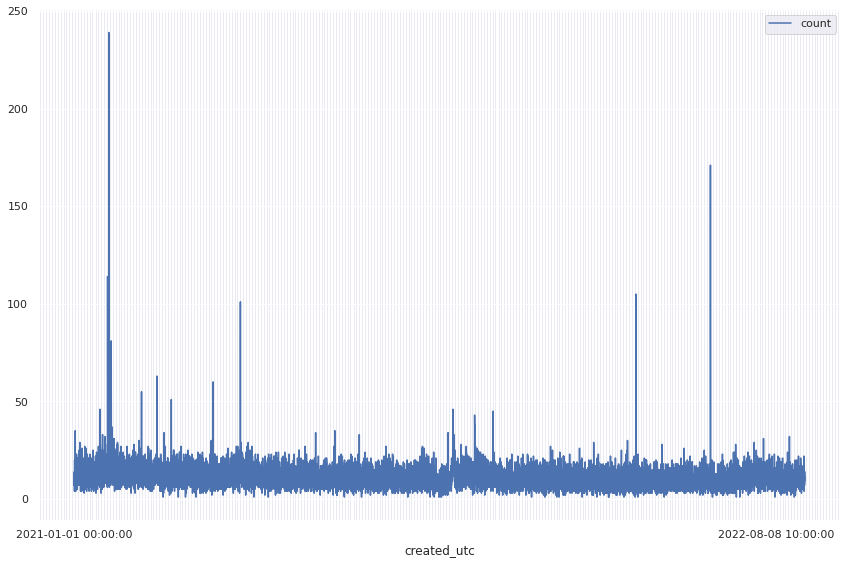

In [0]:
import matplotlib.dates as mdates
ax1 = ts_ytb.plot(figsize=(12, 8))
ax1.xaxis.set_major_locator(mdates.MonthLocator())
plt.tight_layout()
plt.show()

In [0]:
number_sub_byhour

Out[260]: (28961, 3)

In [0]:
plt.figure(figsize=(16, 8))
sns.set_theme(style='darkgrid')  # 'whitegrid', 'dark', 'white', 'ticks'
plt.plot(ts_ytb).set(title='Number of Submissions Per Hour')
#sns.lineplot(data=ts_twc)
plt.tight_layout()
plt.show()

Here, a previously written time series analysis toolbox will be called for several helper functions and tools.

In [0]:
import requests
my = requests.get('https://raw.githubusercontent.com/herrzilinski/toolbox/main/handy.py')
open('handy.py', 'w').write(my.text)

Out[128]: 38992

In [0]:
sc = spark.sparkContext
sc.addPyFile('handy.py')
from handy import ADF_Cal, kpss_test, ACF_PACF_Plot, differencing, GPAC_cal, GPAC_cal, SARIMA_Estimate

In [0]:
ADF_Cal(ts_ytb)

ADF Statistic: -10.733082
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [0]:
kpss_test(ts_ytb)

Results of KPSS Test:
Test Statistic           11.230248
p-value                   0.010000
Lags Used                48.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [0]:
ADF_Cal(ts_twc)

ADF Statistic: -4.806466
p-value: 0.000053
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [0]:
kpss_test(ts_twc)

Results of KPSS Test:
Test Statistic           17.007569
p-value                   0.010000
Lags Used                62.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Based on ADF and KPSS test results, both Twitch and Youtube subreddit's hourly submission are stationary.

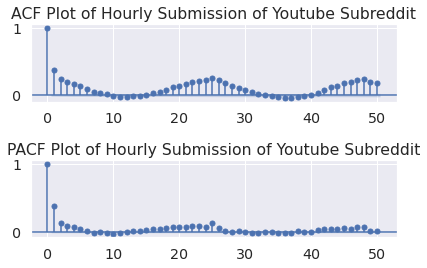

In [0]:
ACF_PACF_Plot(ts_ytb, lags=50, series_name='Hourly Submission of Youtube Subreddit')

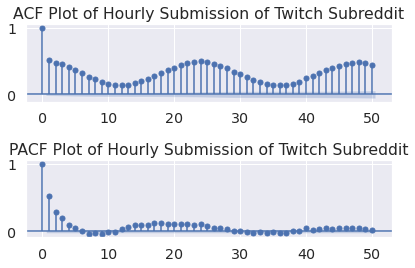

In [0]:
ACF_PACF_Plot(ts_twc, lags=50, series_name='Hourly Submission of Twitch Subreddit')

The ACF/PACF plot suggest the time series are underdifferenced.

In [0]:
y_H1 = differencing(ts_ytb.to_numpy(), order=1)

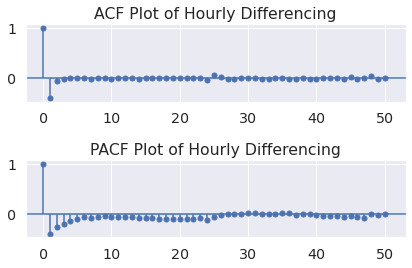

In [0]:
ACF_PACF_Plot(y_H1, lags=50, series_name='Hourly Differencing')

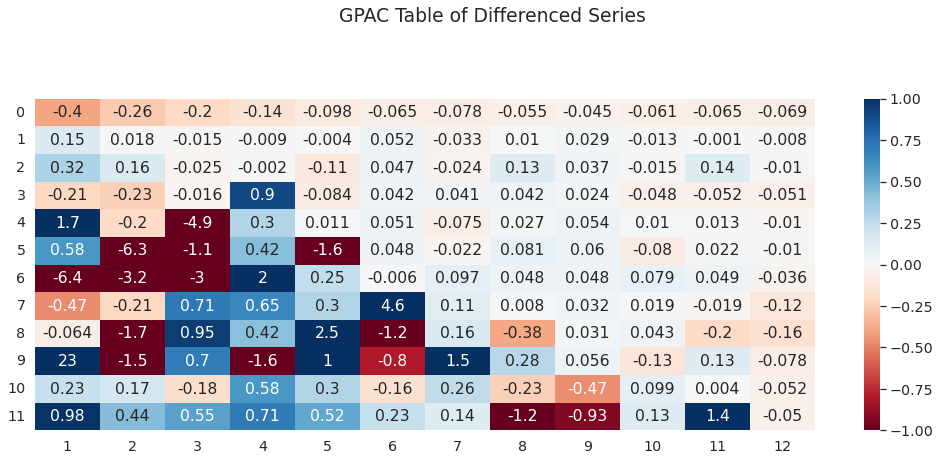

In [0]:
GPAC_table = GPAC_cal(y_H1, 25, 12, 12, series_name='Differenced Series', astable=True)
fig, ax = plt.subplots()
sns.heatmap(GPAC_table, annot=True, vmin=-1, vmax=1, cmap='RdBu', ax=ax)

fig.suptitle(f'GPAC Table of Differenced Series')
fig.tight_layout()
fig.set_size_inches(16, 7)
fig.show()

Combining the information from ACF/PACF and GPAC, we are looking for a ARIMA(0, 1, 1) or ARIMA(1, 1, 1) model for the differenced time series.

In [0]:
import statsmodels.api as sm
model_MA1 = sm.tsa.SARIMAX(ts_ytb, order=(0, 1, 1)).fit(trend='nc', disp=0)
model_MA1.summary()

/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX Results 
 
 Dep. Variable: count No. Observations: 14566 
 
 
 Model: SARIMAX(0, 1, 1) Log Likelihood -44984.330 
 
 
 Date: Sun, 04 Dec 2022 AIC 89972.661 
 
 
 Time: 01:32:36 BIC 89987.834 
 
 
 Sample: 0 HQIC 89977.702 
 
 
 - 14566 
 
 
 Covariance Type: opg 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 ma.L1 -0.7381 0.001 -548.930 0.000 -0.741 -0.735 
 
 
 sigma2 28.1941 0.033 849.332 0.000 28.129 28.259 
 
 
 
 
 Ljung-Box (L1) (Q): 182.31 Jarque-Bera (JB): 36465833.78 
 
 
 Prob(Q): 0.00 Prob(JB): 0.00 
 
 
 Heteroskedasticity (H): 0.63 Skew: 7.35 
 
 
 Prob(H) (two-sided): 0.00 Kurtosis: 247.69 
 
 Warnings: [1] Covariance matrix calculated using the outer product of gradients (complex-step).

the MA factor in the time series is potent. Now we will compare it with ARIMA(1,1,1) model.

In [0]:
model_AR1MA1 = model = sm.tsa.SARIMAX(ts_ytb, order=(1, 1, 1)).fit(trend='nc', disp=0)
model_AR1MA1.summary()

/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX Results 
 
 Dep. Variable: count No. Observations: 14566 
 
 
 Model: SARIMAX(1, 1, 1) Log Likelihood -44371.032 
 
 
 Date: Sun, 04 Dec 2022 AIC 88748.065 
 
 
 Time: 00:23:36 BIC 88770.824 
 
 
 Sample: 0 HQIC 88755.627 
 
 
 - 14566 
 
 
 Covariance Type: opg 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 ar.L1 0.3181 0.002 138.953 0.000 0.314 0.323 
 
 
 ma.L1 -0.9892 0.001 -910.041 0.000 -0.991 -0.987 
 
 
 sigma2 25.9126 0.034 764.539 0.000 25.846 25.979 
 
 
 
 
 Ljung-Box (L1) (Q): 11.16 Jarque-Bera (JB): 43950953.71 
 
 
 Prob(Q): 0.00 Prob(JB): 0.00 
 
 
 Heteroskedasticity (H): 0.61 Skew: 8.19 
 
 
 Prob(H) (two-sided): 0.00 Kurtosis: 271.61 
 
 Warnings: [1] Covariance matrix calculated using the outer product of gradients (complex-step).

Comparing with the previous model, ARIMA(1,1,1) model has improved AIC and BIC. AR argument added is significant as well, judjing by the coefficient's confidence interval.

In [0]:
model_AR2MA1 = model = sm.tsa.SARIMAX(ts_ytb, order=(2, 1, 1)).fit(trend='nc', disp=0)
model_AR2MA1.summary()

/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX Results 
 
 Dep. Variable: count No. Observations: 14566 
 
 
 Model: SARIMAX(2, 1, 1) Log Likelihood -44314.244 
 
 
 Date: Sat, 03 Dec 2022 AIC 88636.489 
 
 
 Time: 23:55:22 BIC 88666.834 
 
 
 Sample: 0 HQIC 88646.571 
 
 
 - 14566 
 
 
 Covariance Type: opg 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 ar.L1 0.2931 0.002 127.671 0.000 0.289 0.298 
 
 
 ar.L2 0.0895 0.004 23.287 0.000 0.082 0.097 
 
 
 ma.L1 -0.9918 0.001 -1019.136 0.000 -0.994 -0.990 
 
 
 sigma2 25.7110 0.036 706.047 0.000 25.640 25.782 
 
 
 
 
 Ljung-Box (L1) (Q): 0.32 Jarque-Bera (JB): 47908225.42 
 
 
 Prob(Q): 0.57 Prob(JB): 0.00 
 
 
 Heteroskedasticity (H): 0.62 Skew: 8.44 
 
 
 Prob(H) (two-sided): 0.00 Kurtosis: 283.46 
 
 Warnings: [1] Covariance matrix calculated using the outer product of gradients (complex-step).

By adding one more AR argument, the confidence interval for its coefficient is much closer to zero. The BIC improvement from adding it is also minimal. We should use the ARIMA(1,1,1) model for describing youtube subreddit's hourly submission activity.

In [0]:
t_H1 = differencing(ts_twc.to_numpy(), order=1)

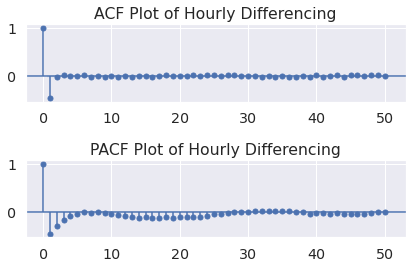

In [0]:
ACF_PACF_Plot(t_H1, lags=50, series_name='Hourly Differencing')

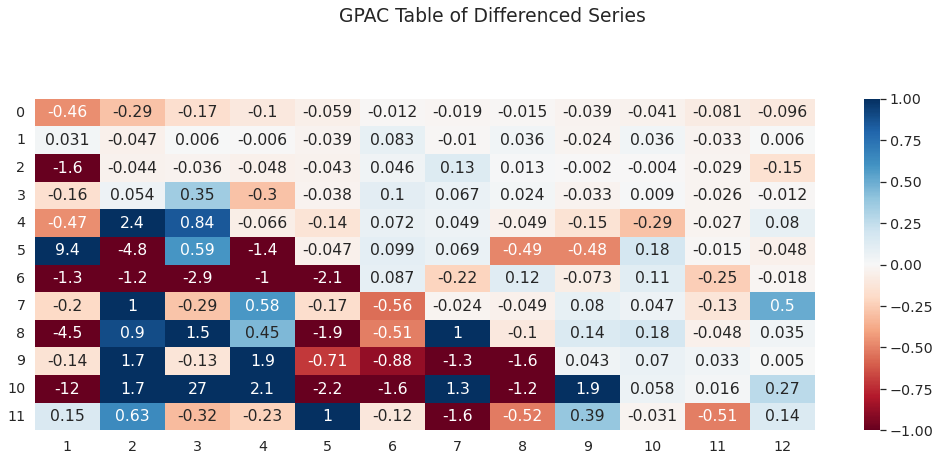

In [0]:
GPAC_table = GPAC_cal(t_H1, 25, 12, 12, series_name='Differenced Series', astable=True)
fig, ax = plt.subplots()
sns.heatmap(GPAC_table, annot=True, vmin=-1, vmax=1, cmap='RdBu', ax=ax)

fig.suptitle(f'GPAC Table of Differenced Series')
fig.tight_layout()
fig.set_size_inches(16, 7)
fig.show() 

By reading the GPAC and ACF/PACF plot, we can see the structure of Twitch subreddit's submission activity is similar to that of youtube, it follows a MA1 structure as well.

In [0]:
model_MA1_t = model = sm.tsa.SARIMAX(ts_twc, order=(0, 1, 1)).fit(trend='nc', disp=0)
model_MA1_t.summary()

/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX Results 
 
 Dep. Variable: count No. Observations: 14395 
 
 
 Model: SARIMAX(0, 1, 1) Log Likelihood -37767.828 
 
 
 Date: Sun, 04 Dec 2022 AIC 75539.655 
 
 
 Time: 00:17:34 BIC 75554.804 
 
 
 Sample: 0 HQIC 75544.692 
 
 
 - 14395 
 
 
 Covariance Type: opg 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 ma.L1 -0.6818 0.004 -154.876 0.000 -0.690 -0.673 
 
 
 sigma2 11.1317 0.073 151.562 0.000 10.988 11.276 
 
 
 
 
 Ljung-Box (L1) (Q): 0.98 Jarque-Bera (JB): 16003.26 
 
 
 Prob(Q): 0.32 Prob(JB): 0.00 
 
 
 Heteroskedasticity (H): 0.43 Skew: 0.71 
 
 
 Prob(H) (two-sided): 0.00 Kurtosis: 7.96 
 
 Warnings: [1] Covariance matrix calculated using the outer product of gradients (complex-step).

In [0]:
model_AR1MA1_t = model = sm.tsa.SARIMAX(ts_twc, order=(1, 1, 1)).fit(trend='nc', disp=0)
model_AR1MA1_t.summary()

/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX Results 
 
 Dep. Variable: count No. Observations: 14395 
 
 
 Model: SARIMAX(1, 1, 1) Log Likelihood -37765.816 
 
 
 Date: Sun, 04 Dec 2022 AIC 75537.633 
 
 
 Time: 00:23:27 BIC 75560.356 
 
 
 Sample: 0 HQIC 75545.187 
 
 
 - 14395 
 
 
 Covariance Type: opg 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 ar.L1 0.0363 0.010 3.625 0.000 0.017 0.056 
 
 
 ma.L1 -0.7097 0.007 -101.191 0.000 -0.723 -0.696 
 
 
 sigma2 11.1287 0.073 151.617 0.000 10.985 11.273 
 
 
 
 
 Ljung-Box (L1) (Q): 0.01 Jarque-Bera (JB): 16420.61 
 
 
 Prob(Q): 0.93 Prob(JB): 0.00 
 
 
 Heteroskedasticity (H): 0.43 Skew: 0.73 
 
 
 Prob(H) (two-sided): 0.00 Kurtosis: 8.03 
 
 Warnings: [1] Covariance matrix calculated using the outer product of gradients (complex-step).

Adding AR element is redundant to the model. ARIMA(0,1,1) is enough for this time series.